<a href="https://colab.research.google.com/github/springboardmentor1234r/ExoHabit-AI/blob/Divyanshu/notebooks/Week3_ML_Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 3 – Machine Learning Dataset Preparation and Baseline Model

In this phase, the cleaned and engineered dataset is prepared for machine
learning. A target variable is defined, features are selected, the data is
split into training and testing sets, and a baseline machine learning model
is trained and evaluated.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/exoplanet_clean_40k.csv')
df.shape


(4001, 289)

In [2]:
# Separate numerical & categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values ONLY
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum().sum()


np.int64(20005)

In [3]:
df = pd.get_dummies(df, drop_first=True)
df.shape


(4001, 12727)

In [5]:
# Final safety fill (after encoding)
df = df.fillna(0)

df.isnull().sum().sum()


np.int64(0)

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Re-identify numeric columns AFTER encoding
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



In [9]:
df['habitable'] = (df['pl_orbsmax'] < df['pl_orbsmax'].median()).astype(int)
df['habitable'].value_counts()



/tmp/ipython-input-4020514595.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['habitable'] = (df['pl_orbsmax'] < df['pl_orbsmax'].median()).astype(int)


,count
habitable,
0,2591
1,1410


Target Variable Definition

A binary target variable named 'habitable' was created using the median
orbital distance (pl_orbsmax). This provides a simple and stable baseline
classification in the absence of confirmed habitability labels.


In [10]:
X = df.drop('habitable', axis=1)
y = df['habitable']

y.value_counts()


,count
habitable,
0,2591
1,1410


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts()


,count
habitable,
0,2072
1,1128


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Accuracy: 0.9313358302122348
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       519
           1       0.91      0.89      0.90       282

    accuracy                           0.93       801
   macro avg       0.93      0.92      0.92       801
weighted avg       0.93      0.93      0.93       801



array([[494,  25],
       [ 30, 252]])

Baseline Model Evaluation

Logistic Regression was trained as a baseline classifier. Model performance
was evaluated using accuracy, precision, recall, F1-score, and confusion
matrix.


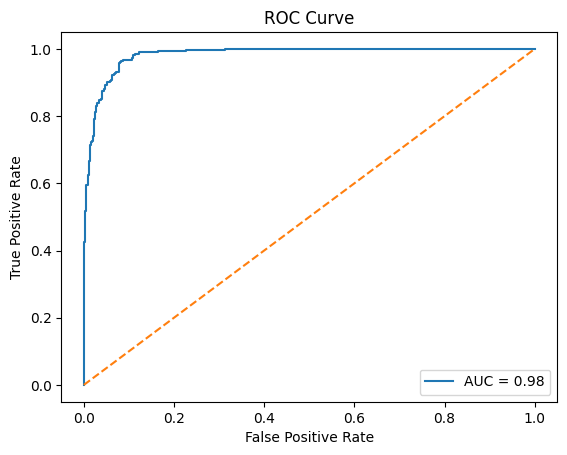

np.float64(0.982754615395127)

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc


In [16]:
X = df.drop('habitable', axis=1)
y = df['habitable']

y.value_counts()


,count
habitable,
0,2591
1,1410


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts()


,count
habitable,
0,2072
1,1128


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9313358302122348
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       519
           1       0.91      0.89      0.90       282

    accuracy                           0.93       801
   macro avg       0.93      0.92      0.92       801
weighted avg       0.93      0.93      0.93       801



Baseline Model Summary
A Logistic Regression model was trained as a baseline classifier to predict planetary habitability.
The dataset was split using an 80–20 stratified approach to preserve class distribution.
The baseline model provides a reference point for future advanced models.